In [1]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))


from preprocess_medoan import MalariaPreprocessor


In [9]:
# Example Usage
data_path = '../Data/merged_weekly_Yemalogi Walal.csv'
target_column = 'Yemalogi Walal'

# Instantiate the class
processor = MalariaPreprocessor(data_path, target_column)

# Load, preprocess, and analyze the data
processor.load_data()
processor.preprocess()

# Get numerical output of class counts and median thresholds
summary = processor.get_classification_summary()

# Print results
print(f"Class 1 Count (Higher): {summary['Class 1 Count (Higher)']}")
print(f"Class 0 Count (Lower): {summary['Class 0 Count (Lower)']}")
print("Median Thresholds (by Month and Week):")
print(summary['Median Thresholds'])

Data loaded successfully with shape: (314, 14)
Data preprocessing completed. Added 'target' column.
Class 1 Count (Higher): 145
Class 0 Count (Lower): 169
Median Thresholds (by Month and Week):
    month  week  Median
0       1     1    0.00
1       1     2    4.00
2       1     3    3.25
3       1     4    4.00
4       1    52  370.00
..    ...   ...     ...
57     12    48   12.00
58     12    49   15.50
59     12    50   11.50
60     12    51    9.50
61     12    52    0.50

[62 rows x 3 columns]


In [10]:


# Load data
processor.load_data()

# Preprocess the data
processor.preprocess()

# Get summary of classifications and medians
summary = processor.get_classification_summary()

# Print the results
print(f"Class 1 Count (Higher): {summary['Class 1 Count (Higher)']}")
print(f"Class 0 Count (Lower): {summary['Class 0 Count (Lower)']}")
print("Median Thresholds (by Month and Week):")
print(summary['Median Thresholds'])

Data loaded successfully with shape: (314, 14)
Data preprocessing completed. Added 'target' column.
Class 1 Count (Higher): 145
Class 0 Count (Lower): 169
Median Thresholds (by Month and Week):
    month  week  Median
0       1     1    0.00
1       1     2    4.00
2       1     3    3.25
3       1     4    4.00
4       1    52  370.00
..    ...   ...     ...
57     12    48   12.00
58     12    49   15.50
59     12    50   11.50
60     12    51    9.50
61     12    52    0.50

[62 rows x 3 columns]


In [11]:
# Save the updated dataset with the new column back to the original file
processor.save_with_classification()

Updated data with 'Median_classification' saved to: ../Data/merged_weekly_Yemalogi Walal.csv


d:\Malaria data\malaria-outbreak-classifcation_prediction\Scripts\preprocess_medoan.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=self.data, palette='viridis')


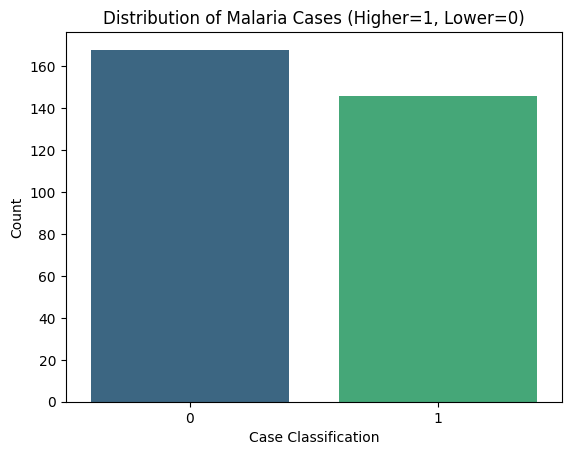

In [5]:
processor.visualize_target_distribution()

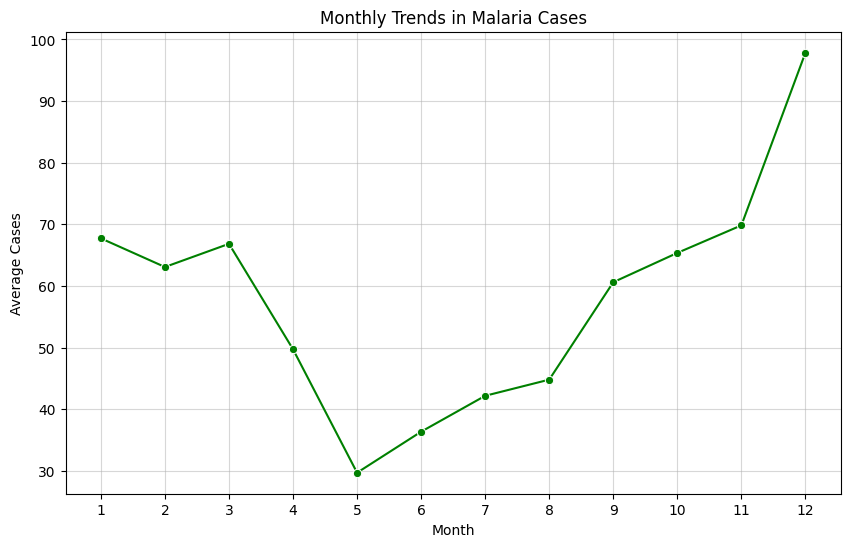

In [6]:
processor.visualize_monthly_trends()


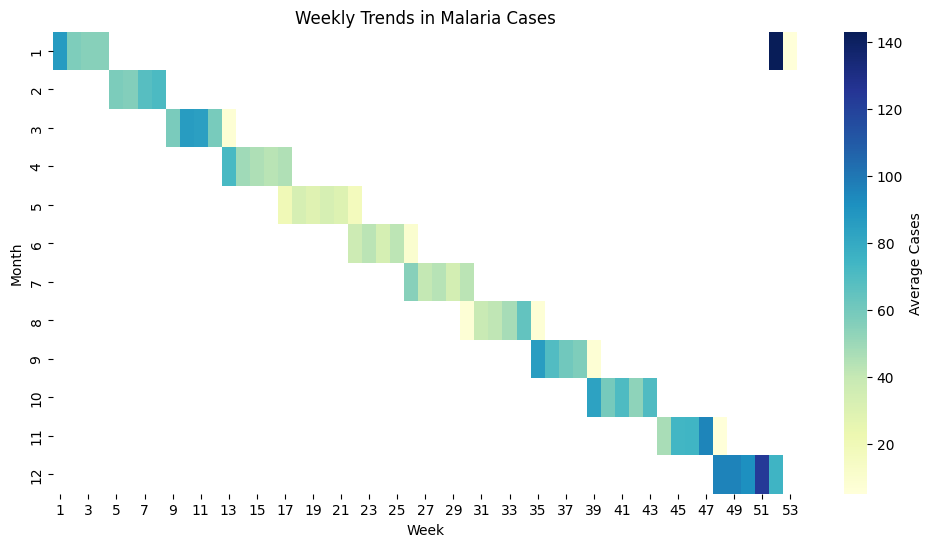

In [7]:
processor.visualize_weekly_trends()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

class MalariaTrendsVisualizer:
    def __init__(self, data_folder):
        self.data_folder = data_folder
        # Load and combine all CSV files from the folder
        self.data = self.load_data()
        
        if self.data.empty:
            print("No data loaded.")
        else:
            # Ensure proper conversion of 'month' and 'week' columns
            self.data['month'] = pd.to_datetime(self.data['month'], errors='coerce').dt.month
            self.data['week'] = pd.to_datetime(self.data['week'], errors='coerce').dt.isocalendar().week

    def load_data(self):
        """
        Loads and combines all CSV files from the given folder into one DataFrame.
        Each CSV file corresponds to a station, and its malaria cases column
        is named after the station (e.g., 'Anfilo').
        """
        all_data = []

        for file in os.listdir(self.data_folder):
            if file.endswith('.csv'):
                file_path = os.path.join(self.data_folder, file)
                print(f"Processing file: {file_path}")
                df = pd.read_csv(file_path)
                
                # Extract station name from the file name (e.g., "merged_weekly_Anfilo.csv" -> "Anfilo")
                station_name = file.split('_')[-1].split('.')[0]
                
                # Check if the station's name exists as a column (e.g., "Anfilo")
                if station_name in df.columns:
                    malaria_column = station_name  # The column with malaria cases
                else:
                    print(f"No column for station {station_name} in {file}. Skipping this file.")
                    continue  # Skip the file if no malaria cases column for the station

                # Rename the malaria cases column to the station name (if not already named)
                df[station_name] = df[malaria_column]
                
                # Drop the original malaria cases column to avoid redundancy
                df.drop(columns=[malaria_column], inplace=True)
                
                # Append the data for this station
                all_data.append(df)
        
        # If no data was appended, print a message
        if not all_data:
            print("No data found to combine.")
            return pd.DataFrame()  # Return an empty DataFrame
        
        # Combine all CSV data into a single DataFrame
        combined_data = pd.concat(all_data, ignore_index=True)
        return combined_data
    
    def visualize_weekly_trends(self):
        # Ensure 'month' and 'week' are in numeric format if necessary
        self.data['month'] = pd.to_datetime(self.data['month'], errors='coerce').dt.month
        self.data['week'] = pd.to_datetime(self.data['week'], errors='coerce').dt.isocalendar().week

        # Create a pivot table: rows are weeks, columns are months, and values are malaria cases for each station
        pivot_data = self.data.pivot_table(index='week', columns='month', values='Anfilo', aggfunc='mean')

        # Create the heatmap for all weeks and months across all stations
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.2f')  # '.2f' for floating-point formatting
        plt.title('Weekly Malaria Cases Heatmap (All Stations)')
        plt.show()
# Path to the folder containing the 16 CSV files
data_folder = 'D:/Malaria data/malaria-outbreak-classifcation_prediction/Data'  # Adjusted folder path

# Initialize the visualizer with the data folder
visualizer = MalariaTrendsVisualizer(data_folder)

# Call the method to generate the heatmap
visualizer.visualize_weekly_trends()

Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Anfilo.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Dale sadi.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Dale Wabera.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Dambi Dollo.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_gawo kebe.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Gidami Primery Hospital.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merged_weekly_Gidami.csv
Processing file: D:/Malaria data/malaria-outbreak-classifcation_prediction/Data\merge

KeyError: 'Anfilo'

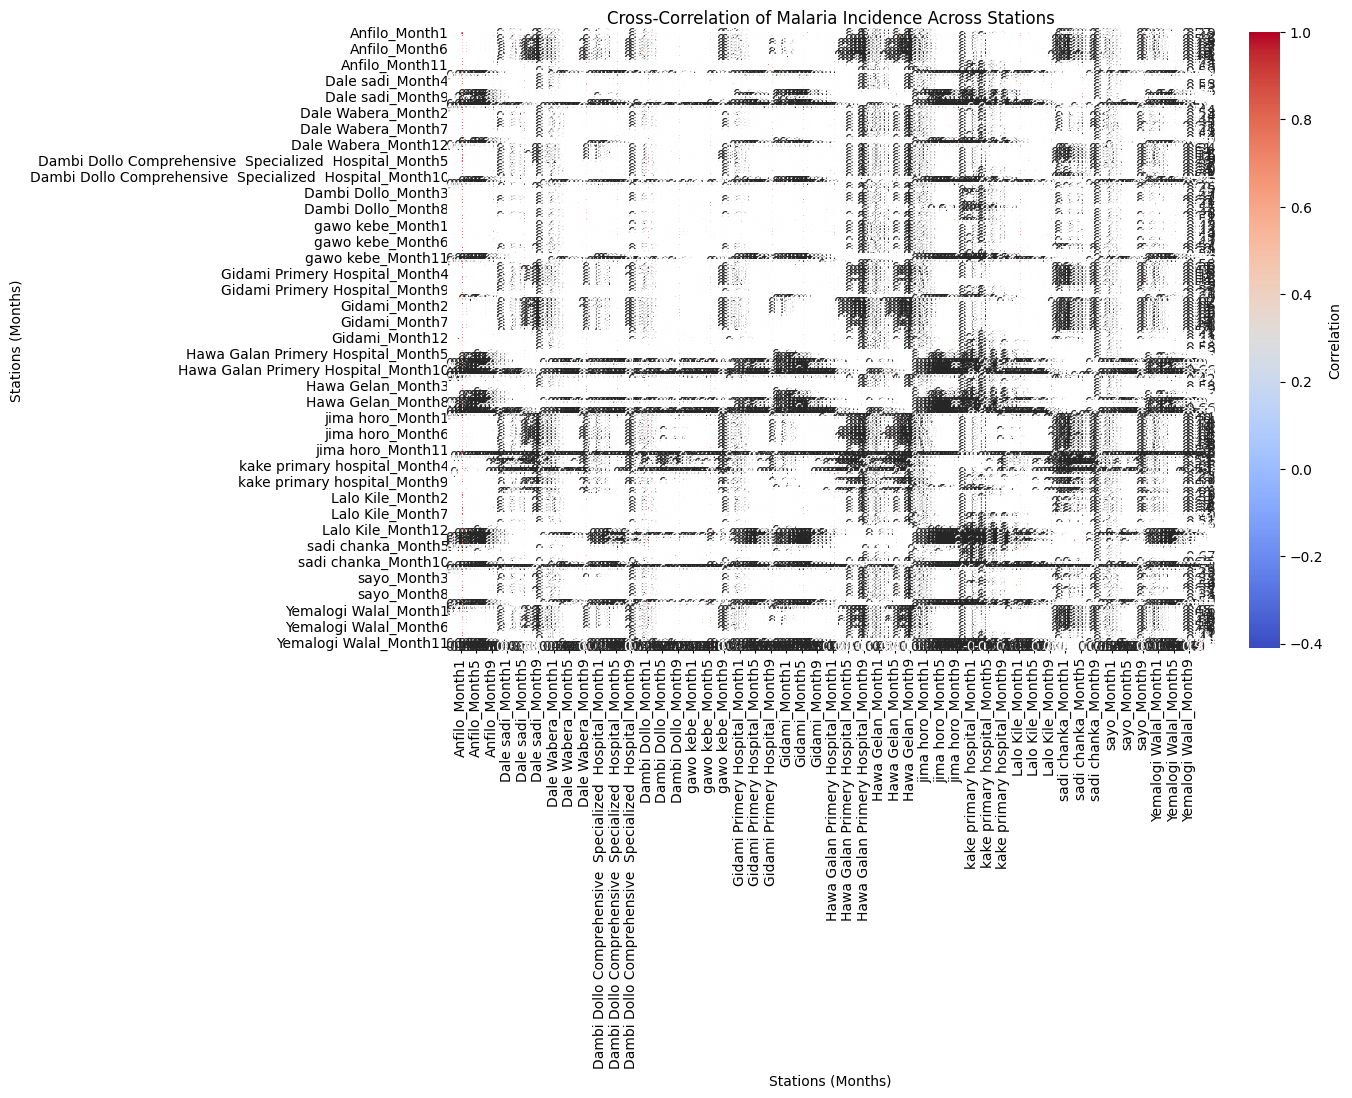

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class MalariaPersistenceVisualizer:
    def __init__(self, data_folder):
        self.data_folder = data_folder

    def get_malaria_column(self, file_name):
        """
        Get the malaria column name based on the file name.
        The column name is assumed to follow a pattern based on the CSV file name.
        """
        base_name = os.path.basename(file_name)
        station_name = base_name.split('_')[2] if len(base_name.split('_')) > 2 else 'Anfilo'
        station_name = station_name.replace('.csv', '')  # Remove '.csv' if it's included
        return station_name

    def calculate_cross_correlation(self, data, malaria_column):
        """
        Calculate the cross-correlation matrix for malaria incidence across months.
        """
        # Extract month and year information
        data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
        data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

        # Group by month and year, calculate mean malaria incidence for each month
        monthly_data = data.groupby(['year', 'month'])[malaria_column].mean().reset_index()
        
        # Pivot table to have months as columns and years as rows
        monthly_pivot = monthly_data.pivot_table(index='year', columns='month', values=malaria_column)
        
        return monthly_pivot

    def visualize_persistence(self):
        # Initialize an empty list to store DataFrames for all stations
        all_station_data = []

        # Iterate over each file in the folder to process malaria data from all stations
        for file_name in os.listdir(self.data_folder):
            if file_name.endswith(".csv"):
                file_path = os.path.join(self.data_folder, file_name)
                
                # Load the data for the current file (station)
                data = pd.read_csv(file_path)
                
                # Get the malaria column name based on the file name
                malaria_column = self.get_malaria_column(file_name)
                
                # Ensure the 'date' column is in the correct format
                data['date'] = pd.to_datetime(data['date'], errors='coerce')

                # Calculate the monthly pivot table for the current station
                monthly_pivot = self.calculate_cross_correlation(data, malaria_column)
                
                # Add the monthly data for the current station with a proper station label
                monthly_pivot = monthly_pivot.rename(columns={col: f'{malaria_column}_Month{col}' for col in monthly_pivot.columns})
                
                # Add the station data to the list
                all_station_data.append(monthly_pivot)

        # Combine data from all stations into one DataFrame
        combined_data = pd.concat(all_station_data, axis=1)

        # Calculate the correlation matrix between the stations' malaria incidence over months
        correlation_matrix = combined_data.corr()

        # Plot the heatmap for the cross-correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
        plt.title('Cross-Correlation of Malaria Incidence Across Stations')
        plt.xlabel('Stations (Months)')
        plt.ylabel('Stations (Months)')
        plt.show()

# Example usage:
data_folder = "../Data"  # Directory path where your CSV files are stored
visualizer = MalariaPersistenceVisualizer(data_folder)

# Visualize persistence of malaria incidence across all stations
visualizer.visualize_persistence()

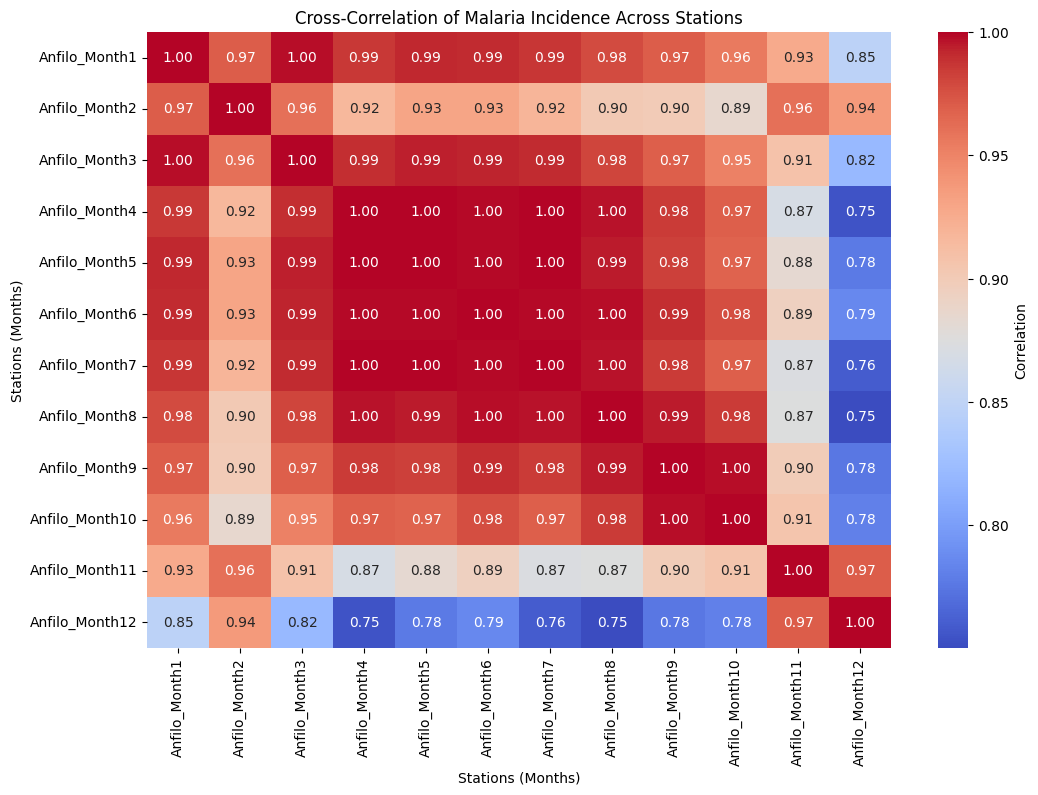

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class MalariaPersistenceVisualizer:
    def __init__(self, data_folder):
        self.data_folder = data_folder

    def get_malaria_column(self, file_name):
        """
        Get the malaria column name based on the file name.
        The column name is assumed to follow a pattern based on the CSV file name.
        """
        base_name = os.path.basename(file_name)
        station_name = base_name.split('_')[2] if len(base_name.split('_')) > 2 else 'Anfilo'
        station_name = station_name.replace('.csv', '')  # Remove '.csv' if it's included
        return station_name

    def calculate_cross_correlation(self, data, malaria_column):
        """
        Calculate the cross-correlation matrix for malaria incidence across months.
        """
        # Extract month and year information
        data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
        data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

        # Group by month and year, calculate mean malaria incidence for each month
        monthly_data = data.groupby(['year', 'month'])[malaria_column].mean().reset_index()
        
        # Pivot table to have months as columns and years as rows
        monthly_pivot = monthly_data.pivot_table(index='year', columns='month', values=malaria_column)
        
        return monthly_pivot

    def visualize_persistence(self):
        # Initialize an empty list to store DataFrames for all stations
        all_station_data = []

        # Iterate over each file in the folder to process malaria data from all stations
        for file_name in os.listdir(self.data_folder):
            if file_name.endswith(".csv") and 'Anfilo' in file_name:  # Only process Anfilo data
                file_path = os.path.join(self.data_folder, file_name)
                
                # Load the data for the current file (station)
                data = pd.read_csv(file_path)
                
                # Get the malaria column name based on the file name
                malaria_column = self.get_malaria_column(file_name)
                
                # Ensure the 'date' column is in the correct format
                data['date'] = pd.to_datetime(data['date'], errors='coerce')

                # Calculate the monthly pivot table for the current station
                monthly_pivot = self.calculate_cross_correlation(data, malaria_column)
                
                # Add the monthly data for the current station with a proper station label
                monthly_pivot = monthly_pivot.rename(columns={col: f'{malaria_column}_Month{col}' for col in monthly_pivot.columns})
                
                # Add the station data to the list
                all_station_data.append(monthly_pivot)

        # Combine data from all stations into one DataFrame
        combined_data = pd.concat(all_station_data, axis=1)

        # Calculate the correlation matrix between the stations' malaria incidence over months
        correlation_matrix = combined_data.corr()

        # Plot the heatmap for the cross-correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
        plt.title('Cross-Correlation of Malaria Incidence Across Stations')
        plt.xlabel('Stations (Months)')
        plt.ylabel('Stations (Months)')
        plt.show()

# Example usage:
data_folder = "../Data"  # Directory path where your CSV files are stored
visualizer = MalariaPersistenceVisualizer(data_folder)

# Visualize persistence of malaria incidence across all stations
visualizer.visualize_persistence()